In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import random
from skimage import io, color, filters, exposure
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules as ar
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [78]:
CWD = os.path.abspath(os.getcwd())
anotations = os.path.join(CWD, 'annotation')
images = os.path.join(CWD, 'images')
final_images = os.path.join(CWD, 'Final_Images')


classes = ['n02113624-toy_poodle', 'n02093859-Kerry_blue_terrier', 'n02108422-bull_mastiff', 'n02085620-Chihuahua']
labels = ['toy_poodle', 'Kerry_blue_terrier', 'bull_mastiff', 'Chihuahua']

In [48]:
grocery_file = os.path.join(CWD, 'Grocery_Items_20.csv')
print(grocery_file)

C:\Users\Dell\Desktop\Data Mining\Grocery_Items_20.csv


In [14]:
grocery_items = pd.read_csv(grocery_file)
grocery_items.head()

,0,1,2,3,4,5,6,7,8,9,10
0,newspapers,newspapers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,specialty chocolate,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,rolls/buns,pork,canned beer,root vegetables,canned beer,shopping bags,oil,soda,NaN,NaN,NaN
3,rolls/buns,newspapers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,soda,flower (seeds),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
temp = grocery_items.apply(lambda row: row.dropna().to_list(), axis = 1)
grocery_list = temp.to_list()

In [53]:
te = TransactionEncoder()
te_ary = te.fit(grocery_list).transform(grocery_list)
df = pd.DataFrame(te_ary, columns = te.columns_)

Using minimum support = 0.01 and minimum confidence threshold = 0.1, what are the association
rules you can extract from your dataset

In [54]:
frequent_itemsets = apriori(df, min_support = 0.01, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.020875,(UHT-milk)
1,0.034875,(beef)
2,0.021875,(berries)
3,0.017125,(beverages)
4,0.047375,(bottled beer)
...,...,...
61,0.011250,"(rolls/buns, other vegetables)"
62,0.015500,"(other vegetables, whole milk)"
63,0.012875,"(rolls/buns, whole milk)"
64,0.010625,"(soda, whole milk)"


In [55]:
ar(frequent_itemsets, metric = "confidence", min_threshold = 0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(rolls/buns),(other vegetables),0.109125,0.12725,0.011250,0.103093,0.810159,-0.002636,0.973066,-0.208252
1,(other vegetables),(whole milk),0.127250,0.15575,0.015500,0.121807,0.782070,-0.004319,0.961350,-0.242015
2,(rolls/buns),(whole milk),0.109125,0.15575,0.012875,0.117984,0.757521,-0.004121,0.957182,-0.264329
3,(soda),(whole milk),0.094750,0.15575,0.010625,0.112137,0.719982,-0.004132,0.950879,-0.300519
4,(yogurt),(whole milk),0.087000,0.15575,0.010000,0.114943,0.737994,-0.003550,0.953893,-0.279983


Use minimum support values (msv): 0.001, 0.005, 0.01 and minimum confidence threshold (mct):
0.05, 0.075, 0.1. For each pair (msv, mct), find the number of association rules extracted from
the dataset

In [60]:
min_support_values = [0.001, 0.005, 0.01]
min_confidence_thresholds = [0.05, 0.075, 0.1]

results = []

for msv in min_support_values:
    frequent_itemsets = apriori(df, min_support=msv, use_colnames=True)
    
    for mct in min_confidence_thresholds:
        rules = ar(frequent_itemsets, metric="confidence", min_threshold=mct)
        results.append({"min_support": msv, "min_confidence": mct, "count": len(rules)})

results_df = pd.DataFrame(results)

counts_df = results_df.pivot(index="min_confidence", columns="min_support", values="count")

In [61]:
counts_df

min_support,0.001,0.005,0.010
min_confidence,,,
0.050,509,55,10
0.075,289,38,8
0.100,161,24,5


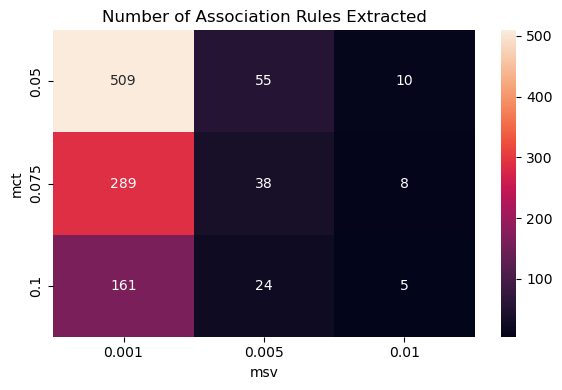

In [66]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(counts_df, annot=True, fmt="g", 
            xticklabels=min_support_values, yticklabels=min_confidence_thresholds,
            ax=ax)
ax.set_xlabel('msv')
ax.set_ylabel('mct')
ax.set_title('Number of Association Rules Extracted')
plt.tight_layout()
plt.show()

 Split the dataset into 50:50 (i.e., 2 equal subsets) and extract association rules for each data subset
for minimum support = 0.005 and minimum confident threshold = 0.075. Show the association
rules for both sets.

In [69]:
# Split the dataset into two equal subsets
subset1 = df.sample(frac = 0.5, random_state = 42)
subset2 = df.drop(subset1.index)

# Extract association rules for subset1
frequent_itemsets1 = apriori(subset1, min_support = 0.005, use_colnames = True)
rules1 = ar(frequent_itemsets1, metric = "confidence", min_threshold = 0.075)

# Extract association rules for subset2
frequent_itemsets2 = apriori(subset2, min_support = 0.005, use_colnames = True)
rules2 = ar(frequent_itemsets2, metric = "confidence", min_threshold = 0.075)

In [70]:
print("Association Rules for Subset 1:")
rules1

Association Rules for Subset 1:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(other vegetables),0.04575,0.12175,0.00625,0.136612,1.122070,0.000680,1.017214,0.114006
1,(bottled beer),(rolls/buns),0.04575,0.11250,0.00500,0.109290,0.971463,-0.000147,0.996396,-0.029864
2,(bottled beer),(whole milk),0.04575,0.15375,0.00700,0.153005,0.995157,-0.000034,0.999121,-0.005073
3,(bottled water),(whole milk),0.06025,0.15375,0.00600,0.099585,0.647708,-0.003263,0.939844,-0.366599
4,(butter),(whole milk),0.03475,0.15375,0.00650,0.187050,1.216588,0.001157,1.040962,0.184438
5,(citrus fruit),(other vegetables),0.05175,0.12175,0.00500,0.096618,0.793580,-0.001301,0.972180,-0.215260
6,(citrus fruit),(whole milk),0.05175,0.15375,0.00675,0.130435,0.848356,-0.001207,0.973187,-0.158607
7,(citrus fruit),(yogurt),0.05175,0.09000,0.00600,0.115942,1.288245,0.001343,1.029344,0.235961
8,(domestic eggs),(whole milk),0.03775,0.15375,0.00575,0.152318,0.990685,-0.000054,0.998311,-0.009676
9,(frankfurter),(other vegetables),0.03675,0.12175,0.00650,0.176871,1.452737,0.002026,1.066965,0.323534


In [72]:
print("\nAssociation Rules for Subset 2:")
rules2


Association Rules for Subset 2:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beef),(whole milk),0.03225,0.15775,0.00550,0.170543,1.081094,0.000413,1.015423,0.077511
1,(bottled beer),(whole milk),0.04900,0.15775,0.00725,0.147959,0.937935,-0.000480,0.988509,-0.065055
2,(bottled water),(other vegetables),0.05900,0.13275,0.00500,0.084746,0.638386,-0.002832,0.947551,-0.375767
3,(bottled water),(whole milk),0.05900,0.15775,0.00725,0.122881,0.778963,-0.002057,0.960246,-0.231685
4,(canned beer),(whole milk),0.04750,0.15775,0.00775,0.163158,1.034281,0.000257,1.006462,0.034798
5,(canned beer),(yogurt),0.04750,0.08400,0.00525,0.110526,1.315789,0.001260,1.029822,0.251969
6,(citrus fruit),(whole milk),0.05400,0.15775,0.00775,0.143519,0.909785,-0.000769,0.983384,-0.094877
7,(coffee),(whole milk),0.03275,0.15775,0.00575,0.175573,1.112980,0.000584,1.021618,0.104948
8,(curd),(whole milk),0.03375,0.15775,0.00500,0.148148,0.939132,-0.000324,0.988728,-0.062860
9,(domestic eggs),(whole milk),0.03575,0.15775,0.00500,0.139860,0.886594,-0.000640,0.979201,-0.117119


In [76]:
# Find common association rules
common_rules = pd.merge(rules1, rules2, on=['antecedents', 'consequents'])

print("\nCommon Association Rules:")
if len(common_rules) > 0:
    print(common_rules)
else:
    print("No common association rules found.")


Common Association Rules:
           antecedents         consequents  antecedent support_x  \
0       (bottled beer)        (whole milk)               0.04575   
1      (bottled water)        (whole milk)               0.06025   
2       (citrus fruit)        (whole milk)               0.05175   
3      (domestic eggs)        (whole milk)               0.03775   
4        (frankfurter)        (whole milk)               0.03675   
5         (newspapers)        (whole milk)               0.04200   
6          (pip fruit)  (other vegetables)               0.05000   
7         (rolls/buns)  (other vegetables)               0.11250   
8   (other vegetables)        (rolls/buns)               0.12175   
9            (sausage)  (other vegetables)               0.05900   
10              (soda)  (other vegetables)               0.09850   
11    (tropical fruit)  (other vegetables)               0.07000   
12  (other vegetables)        (whole milk)               0.12175   
13        (whole milk

## Image Classification using CNN 

In [89]:
data_list = []

for k, cls in enumerate(classes):
    imgs_filename = os.path.join(CWD, 'Final_images', cls)
    img_files = [file for file in os.listdir(imgs_filename)]
    for img_file in img_files:
        file_image = os.path.join(imgs_filename, img_file)
        color_img = io.imread(file_image)
        data_list.append({'img': color_img, 'class': k})

classes_df = pd.DataFrame(data_list)

classes_df

,img,class
0,"[[[158, 116, 100], [161, 119, 103], [166, 124,...",0
1,"[[[26, 41, 46], [13, 28, 31], [2, 16, 19], [0,...",0
2,"[[[221, 129, 106], [168, 84, 58], [132, 63, 32...",0
3,"[[[4, 4, 4], [4, 4, 4], [4, 4, 4], [4, 4, 4], ...",0
4,"[[[49, 44, 38], [52, 47, 41], [52, 47, 41], [4...",0
...,...,...
633,"[[[40, 157, 252], [39, 156, 251], [38, 157, 25...",3
634,"[[[66, 77, 60], [58, 71, 51], [38, 51, 31], [3...",3
635,"[[[187, 165, 105], [187, 165, 105], [187, 165,...",3
636,"[[[217, 225, 202], [221, 228, 212], [220, 228,...",3


In [113]:
X_image = classes_df['img']
X_image = np.stack(X_image, axis = 0)
Y_label = classes_df['class']

In [114]:
X_train, x_test, Y_train, y_test = train_test_split(X_image, Y_label, test_size=0.2, random_state=42)

In [116]:
# Model / data parameters
num_classes = 4

# Normalize pixel values
X_train = X_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
Y_train = to_categorical(Y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(Y_train)

[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


In [118]:
# Define the CNN architecture
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, batch_size = 100, epochs = 20, validation_data = (x_test, y_test))

Epoch 1/20
6/6 [==============================] - 5s 467ms/step - loss: 1.7518 - accuracy: 0.2725 - val_loss: 1.5960 - val_accuracy: 0.2266
Epoch 2/20
6/6 [==============================] - 2s 362ms/step - loss: 1.4335 - accuracy: 0.2647 - val_loss: 1.3267 - val_accuracy: 0.2656
Epoch 3/20
6/6 [==============================] - 3s 444ms/step - loss: 1.3556 - accuracy: 0.2471 - val_loss: 1.3683 - val_accuracy: 0.3047
Epoch 4/20
6/6 [==============================] - 2s 378ms/step - loss: 1.3658 - accuracy: 0.2843 - val_loss: 1.3397 - val_accuracy: 0.3125
Epoch 5/20
6/6 [==============================] - 2s 367ms/step - loss: 1.3373 - accuracy: 0.3863 - val_loss: 1.2923 - val_accuracy: 0.3984
Epoch 6/20
6/6 [==============================] - 2s 336ms/step - loss: 1.2823 - accuracy: 0.3255 - val_loss: 1.2707 - val_accuracy: 0.3203
Epoch 7/20
6/6 [==============================] - 2s 341ms/step - loss: 1.2198 - accuracy: 0.3588 - val_loss: 1.2645 - val_accuracy: 0.3203
Epoch 8/20
6/6 [====

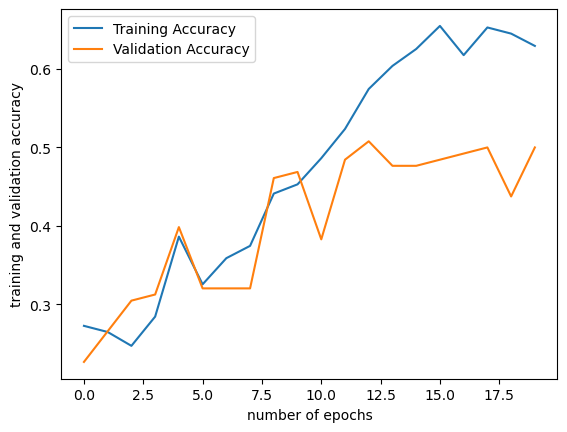

In [119]:
# Plot the learning curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('number of epochs')
plt.ylabel('training and validation accuracy')
plt.legend()
plt.show()

In [120]:
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.1320816278457642
Test accuracy: 0.5


In [130]:
banner_id = '916466101'
print('bannerid:', banner_id)

bannerid: 916466101


#### last digit of Bannerid is 1. So,Train the CNN using 2 other filter sizes: 5 × 5 and 7 × 7 for the convolution layer (i) with all other parameters unchanged

#### For 5X5 filters

In [123]:
model_5_filters = Sequential([
    Conv2D(8, (5, 5), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

# Compile the model
model_5_filters.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Train the model
history_5_filters = model_5_filters.fit(X_train, Y_train, batch_size = 100, epochs = 20, validation_data = (x_test, y_test))

Epoch 1/20
6/6 [==============================] - 5s 542ms/step - loss: 3.0632 - accuracy: 0.2255 - val_loss: 1.9260 - val_accuracy: 0.2656
Epoch 2/20
6/6 [==============================] - 3s 457ms/step - loss: 1.6831 - accuracy: 0.2627 - val_loss: 1.3762 - val_accuracy: 0.2734
Epoch 3/20
6/6 [==============================] - 3s 442ms/step - loss: 1.3806 - accuracy: 0.3020 - val_loss: 1.3792 - val_accuracy: 0.3516
Epoch 4/20
6/6 [==============================] - 3s 456ms/step - loss: 1.3726 - accuracy: 0.3804 - val_loss: 1.3318 - val_accuracy: 0.4375
Epoch 5/20
6/6 [==============================] - 3s 450ms/step - loss: 1.3191 - accuracy: 0.3765 - val_loss: 1.3275 - val_accuracy: 0.4062
Epoch 6/20
6/6 [==============================] - 3s 463ms/step - loss: 1.2972 - accuracy: 0.4745 - val_loss: 1.3581 - val_accuracy: 0.4219
Epoch 7/20
6/6 [==============================] - 3s 482ms/step - loss: 1.2752 - accuracy: 0.4608 - val_loss: 1.3704 - val_accuracy: 0.3359
Epoch 8/20
6/6 [====

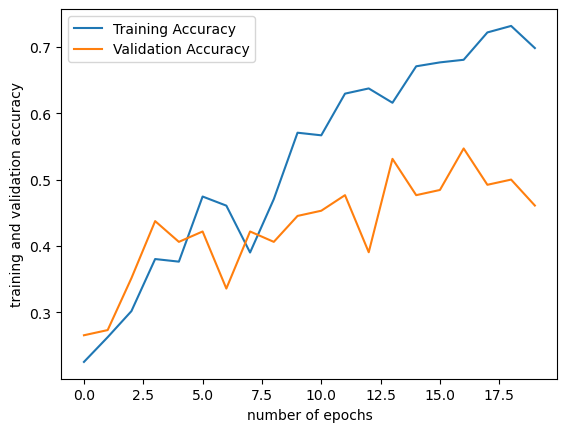

In [124]:
# Plot the learning curves
plt.plot(history_5_filters.history['accuracy'], label='Training Accuracy')
plt.plot(history_5_filters.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('number of epochs')
plt.ylabel('training and validation accuracy')
plt.legend()
plt.show()

In [127]:
score_5_filters = model_5_filters.evaluate(x_test, y_test, verbose = 0)
print("Test loss:", score_5_filters[0])
print("Test accuracy:", score_5_filters[1])

Test loss: 1.1800062656402588
Test accuracy: 0.4609375


#### For 7X7 filters

In [126]:
model_7_filters = Sequential([
    Conv2D(8, (7, 7), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

# Compile the model
model_7_filters.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Train the model
history_7_filters = model_7_filters.fit(X_train, Y_train, batch_size = 100, epochs = 20, validation_data = (x_test, y_test))

Epoch 1/20
6/6 [==============================] - 7s 998ms/step - loss: 1.5965 - accuracy: 0.2608 - val_loss: 1.3767 - val_accuracy: 0.3125
Epoch 2/20
6/6 [==============================] - 5s 762ms/step - loss: 1.3831 - accuracy: 0.2588 - val_loss: 1.3834 - val_accuracy: 0.2734
Epoch 3/20
6/6 [==============================] - 5s 814ms/step - loss: 1.3626 - accuracy: 0.2941 - val_loss: 1.3546 - val_accuracy: 0.2656
Epoch 4/20
6/6 [==============================] - 5s 747ms/step - loss: 1.3395 - accuracy: 0.2902 - val_loss: 1.3502 - val_accuracy: 0.2656
Epoch 5/20
6/6 [==============================] - 5s 818ms/step - loss: 1.3206 - accuracy: 0.3039 - val_loss: 1.3661 - val_accuracy: 0.2734
Epoch 6/20
6/6 [==============================] - 4s 737ms/step - loss: 1.2671 - accuracy: 0.3431 - val_loss: 1.3375 - val_accuracy: 0.3047
Epoch 7/20
6/6 [==============================] - 5s 763ms/step - loss: 1.2334 - accuracy: 0.4098 - val_loss: 1.2568 - val_accuracy: 0.3750
Epoch 8/20
6/6 [====

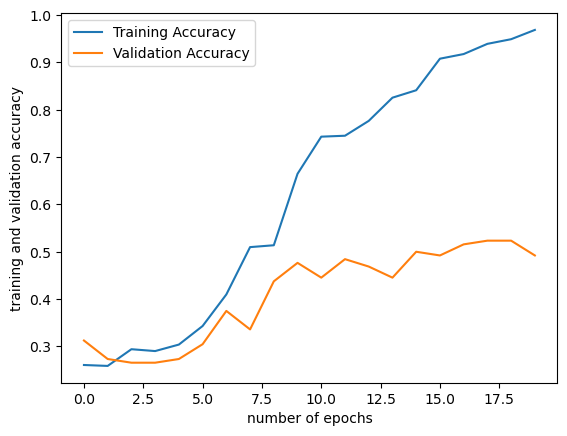

In [128]:
# Plot the learning curves
plt.plot(history_7_filters.history['accuracy'], label='Training Accuracy')
plt.plot(history_7_filters.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('number of epochs')
plt.ylabel('training and validation accuracy')
plt.legend()
plt.show()

In [129]:
score_7_filters = model_7_filters.evaluate(x_test, y_test, verbose = 0)
print("Test loss:", score_7_filters[0])
print("Test accuracy:", score_7_filters[1])

Test loss: 1.210766077041626
Test accuracy: 0.4921875


From above graphs from three different convolutional neural network (CNN) models with varying filter sizes (3x3, 5x5, and 7x7) to perform 4-class classification. After training and evaluating the models, we found that all three models were underfitting the data. The model with 3x3 filters had the best performance among the three, but its accuracy was still low. Increasing the filter size to 5x5 or 7x7 did not improve the results and even led to lower accuracy. To address the underfitting problem, we can try making the models more complex by adding more layers or filters, using data augmentation techniques to increase the variety of training examples, adjusting the hyperparameters to find better configurations, or exploring different CNN architectures that might be more suitable.